# 중고차 데이터

In [ ]:
from google.colab import files
uploaded = files.upload()
# brandcar 데이터 업로드

In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from category_encoders import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error,r2_score
from xgboost import XGBRegressor

## data road

In [ ]:
audi = pd.read_csv('audi.csv')
bmw = pd.read_csv('bmw.csv')
ford = pd.read_csv('ford.csv')
hd = pd.read_csv('hyundi.csv')
merc = pd.read_csv('merc.csv')
toyota = pd.read_csv('toyota.csv')
vw = pd.read_csv('vw.csv')

vw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


In [ ]:
#brand 추가 
audi['brand'] = 'audi'
bmw['brand'] = 'bmw'
merc['brand'] = 'benz'
hd['brand'] = 'hyundi'
ford['brand'] = 'ford'
toyota['brand'] = 'toyota'
vw['brand'] = 'vw'

# 모델, 연식, 가격, 수동/자동, km, 연료, tax, 연비, 엔진크기, 브랜드

In [ ]:
print(audi['model'].value_counts().head(1)) # A3
print(bmw['model'].value_counts().head(1)) # 3 Series
print(merc['model'].value_counts().head(1)) # C Class
print(hd['model'].value_counts().head(1)) # Tucson
print(ford['model'].value_counts().head(1)) # Fiesta
print(toyota['model'].value_counts().head(1)) # Yaris
print(vw['model'].value_counts().head(1)) # Golf

In [ ]:
hd.rename(columns={'tax(£)':'tax'},inplace=True)
hd

In [ ]:
df = pd.concat([audi, bmw, merc, hd, ford, toyota, vw])
df.reset_index(drop=True, inplace=True)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
79283,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,vw
79284,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,vw
79285,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,vw
79286,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,vw


In [ ]:
df[df['engineSize']==0.0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
7505,Q5,2019,44790,Automatic,5886,Petrol,135,117.7,0.0,audi
7506,Q3,2019,32788,Automatic,1500,Diesel,145,47.1,0.0,audi
7516,Q3,2020,29944,Manual,1500,Petrol,145,40.9,0.0,audi
7517,Q3,2020,33333,Automatic,1500,Diesel,145,47.1,0.0,audi
7518,Q3,2020,29944,Automatic,1500,Petrol,145,32.5,0.0,audi
...,...,...,...,...,...,...,...,...,...,...
75779,Tiguan,2016,15300,Manual,38398,Diesel,145,53.3,0.0,vw
75786,Tiguan,2018,24000,Automatic,22200,Diesel,145,47.9,0.0,vw
76952,Up,2017,8500,Manual,20324,Petrol,20,64.2,0.0,vw
77010,Up,2017,8000,Manual,24444,Petrol,20,60.1,0.0,vw


## 전처리

### 요약/상관관계

In [ ]:
df.describe()
#year 2060/1970 데이터 삭제 
#enginesize 0값 mean으로 대체

,year,price,mileage,tax,mpg,engineSize
count,79288.000000,79288.000000,79288.000000,79288.000000,79288.000000,79288.000000
mean,2017.077162,18105.475520,23215.615806,119.072747,55.678822,1.723745
std,2.152110,10353.436627,21399.737187,65.202159,17.160138,0.591953
min,1970.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10950.000000,7165.000000,125.000000,47.100000,1.300000
50%,2017.000000,15995.000000,17500.000000,145.000000,55.400000,1.600000
75%,2019.000000,22490.000000,32741.250000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [ ]:
df.corr() 
# mile과 year 강한 음적 상관관계
# year 높을수록 mile(주행거리) 낮음
# price와 enginesize 뚜렷한 양적 상관관계
# price 높을수록 neginesize 큼

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.510846,-0.744660,0.194321,-0.135979,-0.030349
price,0.510846,1.000000,-0.438376,0.339899,-0.335410,0.634547
mileage,-0.744660,-0.438376,1.000000,-0.212662,0.181367,0.097949
tax,0.194321,0.339899,-0.212662,1.000000,-0.439740,0.321777
mpg,-0.135979,-0.335410,0.181367,-0.439740,1.000000,-0.288402
engineSize,-0.030349,0.634547,0.097949,0.321777,-0.288402,1.000000


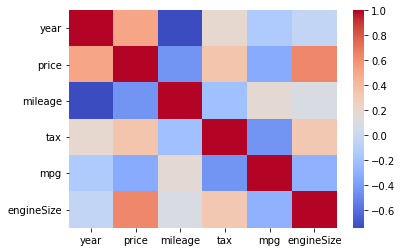

In [ ]:
#heatmap으로 상관관계 확인
co = df.corr()
sns.heatmap(co, cmap='coolwarm')
plt.show()

### year

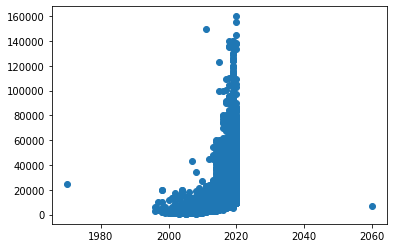

In [ ]:
plt.scatter(df['year'],df['price'])

In [ ]:
df.sort_values('year',ascending=False)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
57154,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4,ford
67347,Golf,2020,18490,Manual,100,Diesel,145,57.7,1.6,vw
69793,Passat,2020,21998,Semi-Auto,12,Diesel,145,49.6,1.6,vw
11345,1 Series,2020,29998,Semi-Auto,934,Diesel,150,48.7,2.0,bmw
26041,B Class,2020,24990,Semi-Auto,19,Diesel,145,55.4,2.0,benz
...,...,...,...,...,...,...,...,...,...,...
20509,Z3,1997,3950,Manual,49000,Petrol,270,35.3,1.9,bmw
33361,SL CLASS,1997,9995,Automatic,76000,Petrol,255,28.2,3.2,benz
56306,Escort,1996,3000,Manual,50000,Petrol,265,34.4,1.8,ford
20293,5 Series,1996,5995,Automatic,36000,Petrol,270,26.4,2.8,bmw


In [ ]:
df = df.drop(index=[57154,33521],axis=0)
df.sort_values('year',ascending=False)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
67347,Golf,2020,18490,Manual,100,Diesel,145,57.7,1.6,vw
26068,A Class,2020,25890,Manual,1499,Petrol,145,47.1,1.3,benz
4623,Q5,2020,42991,Semi-Auto,2648,Diesel,145,38.2,2.0,audi
11345,1 Series,2020,29998,Semi-Auto,934,Diesel,150,48.7,2.0,bmw
26041,B Class,2020,24990,Semi-Auto,19,Diesel,145,55.4,2.0,benz
...,...,...,...,...,...,...,...,...,...,...
33361,SL CLASS,1997,9995,Automatic,76000,Petrol,255,28.2,3.2,benz
10427,A8,1997,4650,Automatic,122000,Petrol,265,18.9,4.2,audi
20509,Z3,1997,3950,Manual,49000,Petrol,270,35.3,1.9,bmw
20293,5 Series,1996,5995,Automatic,36000,Petrol,270,26.4,2.8,bmw


### engineSize

In [ ]:
es_mean="{:.1f}".format(np.mean(df['engineSize']))
es_mean = pd.to_numeric(es_mean)
df.replace({'engineSize':0.0},es_mean,inplace=True)
df['engineSize'].value_counts()

2.0    24982
1.0    14583
1.5    10169
1.6     5869
3.0     5447
1.2     4059
2.1     4018
1.4     3593
1.8     1640
1.3     1332
1.7      989
1.1      566
2.5      455
2.2      446
4.0      357
2.9      171
2.3      153
4.4       79
2.4       72
5.0       52
5.5       44
2.8       38
3.2       26
4.2       26
4.7       24
5.2       23
3.5       20
1.9       13
6.2       13
2.7        8
0.6        7
6.6        2
6.0        2
3.7        2
4.1        2
5.4        1
4.3        1
6.3        1
4.5        1
Name: engineSize, dtype: int64

### mileage

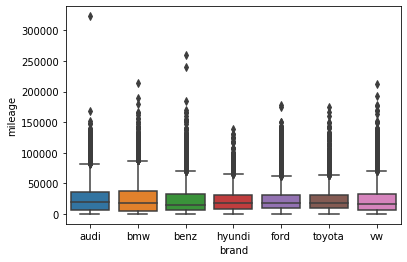

In [ ]:
sns.boxplot(y='mileage',
            x='brand',
            data=df)
# mileage 이상치 확인

In [ ]:
df.sort_values('mileage',ascending=False).head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
9822,A6,2008,2490,Manual,323000,Diesel,200,44.1,2.0,audi
32793,V Class,2010,6949,Automatic,259000,Diesel,540,30.7,3.0,benz
34353,A Class,2016,16249,Automatic,240494,Diesel,20,68.9,2.1,benz
20087,X5,2012,7250,Automatic,214000,Diesel,300,37.7,3.0,bmw
77620,Caravelle,2012,11995,Semi-Auto,212000,Diesel,325,34.4,2.0,vw
69399,Golf,2009,2250,Manual,193000,Diesel,160,52.3,2.0,vw
18981,3 Series,2011,3493,Manual,190000,Diesel,20,68.9,2.0,bmw
33030,CLK,2003,3495,Automatic,185000,Petrol,330,17.8,4.3,benz
20082,5 Series,2013,8999,Automatic,178987,Hybrid,190,40.4,3.0,bmw
77611,Caravelle,2006,7994,Manual,178000,Diesel,325,34.4,2.5,vw


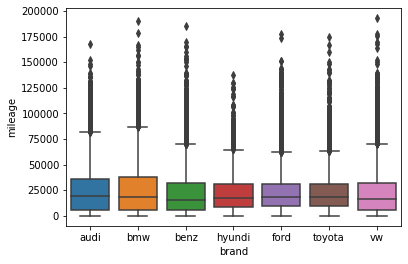

In [ ]:
df = df[df['mileage']<=200000]

sns.boxplot(y='mileage',
            x='brand',
            data=df)

### price

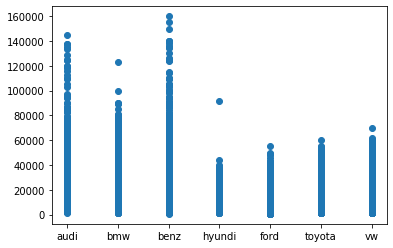

In [ ]:
plt.scatter(df['brand'],df['price']) # bmw,hyundi

In [ ]:
df[df['brand']=='hyundi'].sort_values('price',ascending=False) # 38815
df[df['brand']=='bmw'].sort_values('price',ascending=False) # 14306

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
14306,2 Series,2015,123456,Semi-Auto,33419,Diesel,20,68.9,2.0,bmw
16030,M4,2016,99950,Automatic,771,Petrol,300,33.2,3.0,bmw
13577,M4,2017,89990,Semi-Auto,1336,Petrol,145,33.2,3.0,bmw
15444,M5,2019,89900,Semi-Auto,2269,Petrol,145,24.1,4.4,bmw
12481,8 Series,2019,88980,Semi-Auto,88,Petrol,145,24.4,4.4,bmw
...,...,...,...,...,...,...,...,...,...,...
17952,5 Series,2002,1595,Automatic,115000,Petrol,325,28.5,2.2,bmw
20674,3 Series,2000,1550,Automatic,93000,Petrol,270,29.7,2.5,bmw
20222,1 Series,2007,1500,Manual,167000,Diesel,125,57.6,2.0,bmw
20364,3 Series,2004,1445,Manual,162000,Diesel,205,49.6,2.0,bmw


In [ ]:
df = df.drop(index=[38815,14306],axis=0)

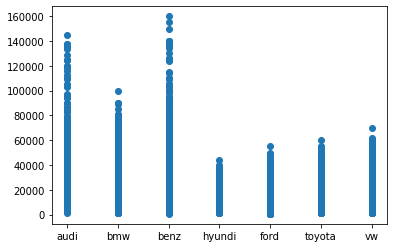

In [ ]:
plt.scatter(df['brand'],df['price'])

### mpg

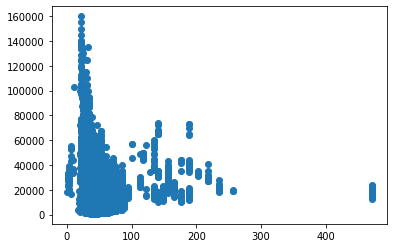

In [ ]:
plt.scatter(df['mpg'],df['price'])

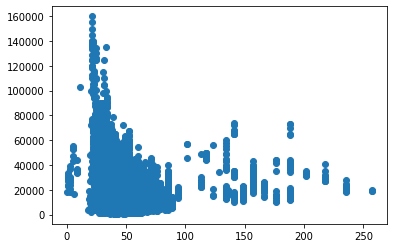

In [ ]:
df = df[df['mpg']<=300]
plt.scatter(df['mpg'],df['price'])


## 모델링

### data 확인

In [ ]:
df.reset_index(drop=True, inplace=True)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
79231,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,vw
79232,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,vw
79233,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,vw
79234,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,vw


In [ ]:
df.to_csv('car.csv',index=False)

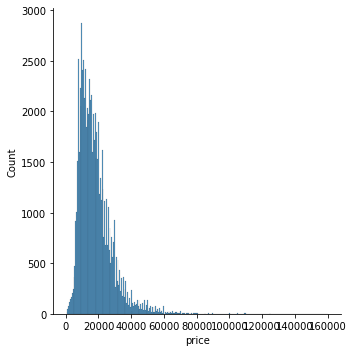

In [ ]:
sns.displot(df['price']) 

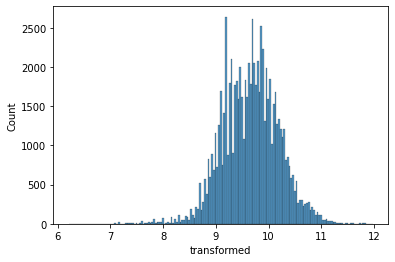

In [ ]:
tf=df['price'] # target 1 
df['transformed']=np.log1p(tf)# target 2

sns.histplot(df['transformed'])

In [ ]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,transformed
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi,9.433564
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi,9.711176
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi,9.305741
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi,9.729194
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi,9.758520
...,...,...,...,...,...,...,...,...,...,...,...
79231,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,vw,8.698014
79232,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,vw,7.495542
79233,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,vw,7.372118
79234,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,vw,7.131699


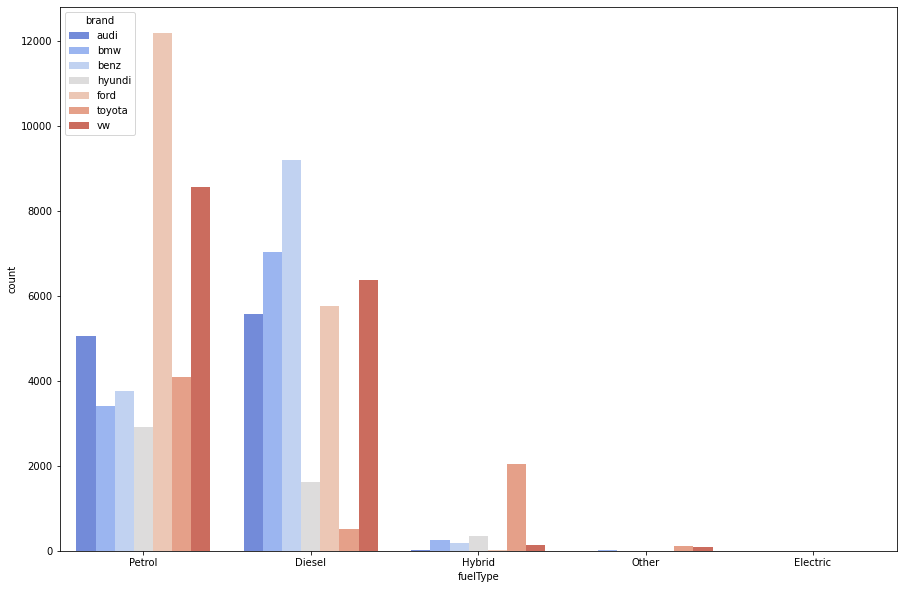

In [ ]:
fig_dims = (15,10)
fig, ax = plt.subplots(figsize=fig_dims)
palette = sns.color_palette('coolwarm',7)
sns.countplot(x='fuelType',hue='brand',ax=ax,data=df,palette=palette)
# 휘발유와 경유에 편향되있어서 특성으로 선택하기에는 적합하지 않음 ,
# 유독 toyota에 hybrid 모델이 많다는 것을 확인할 수 있음

In [ ]:
df['price'].groupby(df['brand']).mean()

brand
audi      22898.598106
benz      24700.571516
bmw       22741.755682
ford      12280.078435
hyundi    12733.821157
toyota    12522.391066
vw        16839.271971
Name: price, dtype: float64

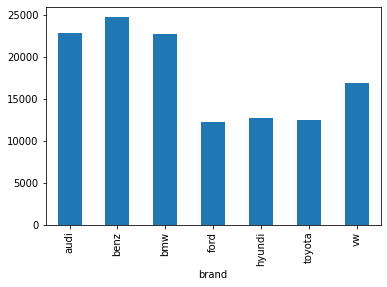

In [ ]:
df.groupby('brand')['price'].mean().plot(kind='bar') 
# benz, audi, bmw 순으로 가격 높음

### 모델선정

#### 데이터 나누기

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=2)
train, val = train_test_split(train, test_size=0.2, random_state=2)
print("train shape: ", train.shape)
print("val shape: ", val.shape)
print("test shape: ", test.shape)

train shape:  (50710, 11)
val shape:  (12678, 11)
test shape:  (15848, 11)


In [ ]:
target = 'price'
features = ['year','mileage','mpg','engineSize','brand'] # ,'brand'

X_train = train[features]
y_train = train[target]  # fit

X_val = val[features]
y_val = val[target]  # 정확도 판별, 예측 오류 평가

X_test = test[features]
y_test = test[target]  # 일반화 오류 평가

In [ ]:
predict = df['price'].mean()
y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)

print(f'훈련 에러: {mae:.2f}')

훈련 에러: 7446.25


#### model_1 : 다중선형회귀

In [ ]:
%%time
pipe_1 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    LinearRegression()
)

pipe_1.fit(X_train, y_train)
acc_L = pipe_1.score(X_val, y_val)
print(f'검증세트 점수 : {acc_L:.2f}')

y_pred = pipe_1.predict(X_train)

mae_L = mean_absolute_error(y_train, y_pred)
print(f'MAE: {mae_L:.2f}')

r2_L = r2_score(y_train,y_pred)
print(f'R2: {r2_L:.2f}')

검증세트 점수 : 0.76
MAE: 3237.35
R2: 0.76
CPU times: user 187 ms, sys: 61.8 ms, total: 249 ms
Wall time: 175 ms


#### model_2 : RandomforestRegressor

In [ ]:
# from sklearn.model_selection import GridSearchCV

# params = { 'n_estimators' : [10, 100],
#            'max_depth' : [6, 8, 10, 12],
#            'min_samples_leaf' : [8, 12, 18],
#            'min_samples_split' : [8, 16, 20]
#             }

# # RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# rf_clf = RandomForestRegressor(random_state = 0, n_jobs = -1)
# grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
# grid_cv.fit(X_train, y_train)

# print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
# print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [ ]:
%%time
pipe_2 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor()
    ) 

pipe_2.fit(X_train, y_train)
acc_R = pipe_2.score(X_val, y_val)
print(f'검증세트 점수 : {acc_R:.2f}')

y_pred = pipe_2.predict(X_train)

mae_R = mean_absolute_error(y_train, y_pred)
print(f'MAE: {mae_R:.2f}')

r2_R = r2_score(y_train,y_pred)
print(f'R2: {r2_R:.2f}')

검증세트 점수 : 0.93
MAE: 618.62
R2: 0.99
7.152557373046875e-07
time :0.0
CPU times: user 16 s, sys: 71.9 ms, total: 16.1 s
Wall time: 16.1 s


In [ ]:
%%time
pipe_2 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(max_depth=12,min_samples_leaf=8,min_samples_split=8,n_estimators=100)
    ) 

pipe_2.fit(X_train, y_train)
acc_RH = pipe_2.score(X_val, y_val)
print(f'검증세트 점수 : {acc_RH:.2f}')

y_pred = pipe_2.predict(X_train)

mae_RH = mean_absolute_error(y_train, y_pred)
print(f'MAE: {mae_RH:.2f}')

r2_RH = r2_score(y_train,y_pred)
print(f'R2: {r2_RH:.2f}')

검증세트 점수 : 0.91
MAE: 1697.42
R2: 0.93
CPU times: user 9.75 s, sys: 33.5 ms, total: 9.79 s
Wall time: 9.78 s


#### model_3 : XGBRegressor

In [ ]:
%%time
pipe_3 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    XGBRegressor()
)

pipe_3.fit(X_train, y_train)
acc_X = pipe_3.score(X_val, y_val)
print(f'검증세트 점수 : {acc_X:.2f}')

y_pred = pipe_3.predict(X_train)

mae_X = mean_absolute_error(y_train, y_pred)
print(f'MAE: {mae_X:.2f}')

r2_X = r2_score(y_train,y_pred)
print(f'R2: {r2_X:.2f}')

[07:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
검증세트 점수 : 0.88
MAE: 2251.81
R2: 0.89
CPU times: user 2.85 s, sys: 11.3 ms, total: 2.86 s
Wall time: 2.86 s


In [ ]:
%%time
from sklearn.compose import TransformedTargetRegressor

pipe_3 = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(),
    XGBRegressor()
)

tt = TransformedTargetRegressor(regressor=pipe_3, func=np.log1p, inverse_func=np.expm1)

tt.fit(X_train, y_train)
acc_XT = tt.score(X_val, y_val)
print(f'검증세트 점수 : {acc_XT:.2f}')

y_pred = tt.predict(X_train)

mae_XT = mean_absolute_error(y_train, y_pred)
print(f'MAE: {mae_XT:.2f}')

r2_XT = r2_score(y_train,y_pred)
print(f'R2: {r2_XT:.2f}')

[08:17:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
검증세트 점수 : 0.88
MAE: 2225.78
R2: 0.88
CPU times: user 2.96 s, sys: 16.8 ms, total: 2.98 s
Wall time: 2.98 s


##비교

In [ ]:
vs = pd.DataFrame(columns=['val score','MAE','R2'])

vs.loc['Linear'] = [acc_L,mae_L,r2_L] # 1초이하
vs.loc['Randomforest'] = [acc_R,mae_R,r2_R] # 16초
vs.loc['Randomforest_h'] = [acc_RH,mae_RH,r2_RH] # 10초
vs.loc['XGBr'] = [acc_X,mae_X,r2_X] # 3초
vs.loc['XGBr_t'] = [acc_XT,mae_XT,r2_XT] #5초

vs

,val score,MAE,R2
Linear,0.756640,3237.345611,0.763206
Randomforest,0.930949,618.615407,0.988894
Randomforest_h,0.911831,1697.423048,0.926675
XGBr,0.884603,2251.809228,0.889606
XGBr_t,0.877326,2225.782170,0.880857


In [ ]:
!pip install shap

[07:35:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


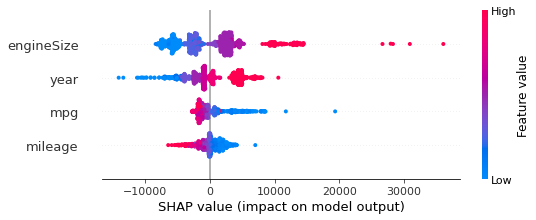

In [ ]:
import shap

model = XGBRegressor().fit(X_train, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap_values = explainer.shap_values(X_test.iloc[:1000])
shap.summary_plot(shap_values, X_test.iloc[:1000])